# Loading Data & Processing

## importing pkgs

In [43]:
## importing pkg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow
import sklearn
sns.set()



## Data loading

In [44]:
# ====== data loading ====== #
data_file = ('data_ec_il_inf.csv')

In [45]:
cp_data_mg = pd.read_csv('data/data_ec_il_inf.csv')
cp_data_mg

,Temp,np_con,C2mim
0,-10,0.0,2.3334
1,-5,0.0,3.0615
2,0,0.0,3.9070
3,5,0.0,4.8433
4,10,0.0,5.9270
...,...,...,...
109,60,1.0,38.0310
110,65,1.0,41.1801
111,70,1.0,43.6329
112,75,1.0,47.0746


# Feature Engineering

In [46]:
cp_data_mg.columns = ['T','wt','ec[S/m]']
cp_data_mg

,T,wt,ec[S/m]
0,-10,0.0,2.3334
1,-5,0.0,3.0615
2,0,0.0,3.9070
3,5,0.0,4.8433
4,10,0.0,5.9270
...,...,...,...
109,60,1.0,38.0310
110,65,1.0,41.1801
111,70,1.0,43.6329
112,75,1.0,47.0746


In [47]:
# converting temp to Kelvin
cp_data_mg['Temp[K]'] = cp_data_mg['T'] + 273.15
cp_data_mg.drop(['T'],axis=1)

,wt,ec[S/m],Temp[K]
0,0.0,2.3334,263.15
1,0.0,3.0615,268.15
2,0.0,3.9070,273.15
3,0.0,4.8433,278.15
4,0.0,5.9270,283.15
...,...,...,...
109,1.0,38.0310,333.15
110,1.0,41.1801,338.15
111,1.0,43.6329,343.15
112,1.0,47.0746,348.15


## Cean Data Checkpoin

In [48]:
cp_clean_data = cp_data_mg.copy() #DATA CHECKPOINT!

In [49]:
corr_matrix = cp_clean_data.corr()
corr_matrix['ec[S/m]'].sort_values(ascending=False)


ec[S/m]    1.000000
Temp[K]    0.848573
T          0.848573
wt         0.478533
Name: ec[S/m], dtype: float64

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_6528/167342473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp_clean_data['ec[S/m]'])


<AxesSubplot: xlabel='ec[S/m]', ylabel='Density'>

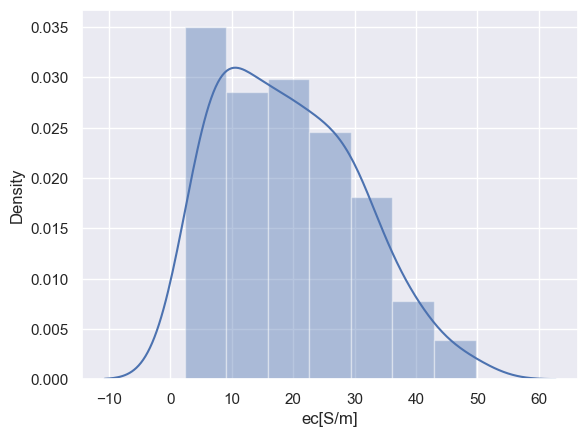

In [50]:
sns.distplot(cp_clean_data['ec[S/m]'])

Checking the assumptions!

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_6528/3936952428.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="ec[S/m]", x="Temp[K]", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
/Users/nirmal/Documents/data_science/electric_conductivity_INF/Electrical_Conductivity_INF_ANN/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


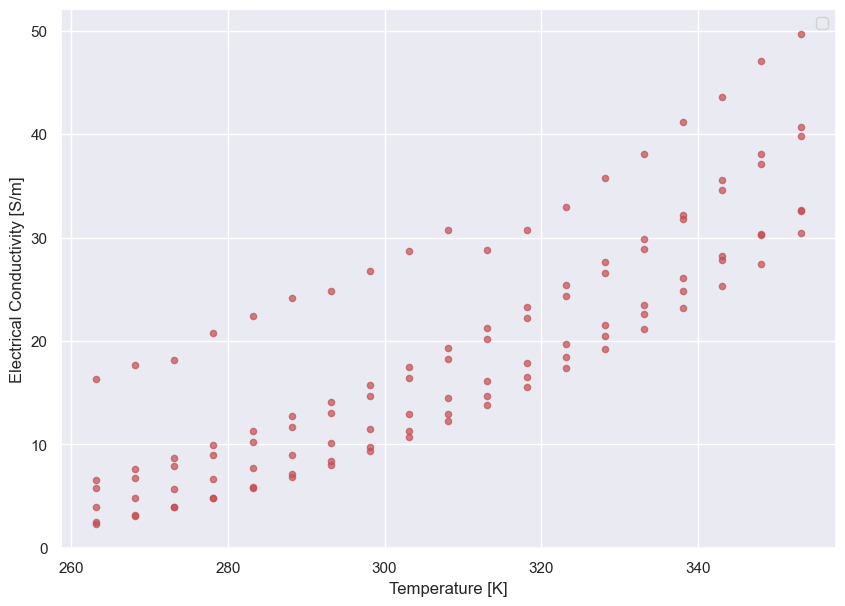

In [51]:
ax1 = cp_clean_data.plot(kind="scatter", y="ec[S/m]", x="Temp[K]", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("Temperature [K]")
ax1.set_ylabel("Electrical Conductivity [S/m]")
plt.legend()


# Train Test & Target Data

In [52]:
# target data
target = np.round(cp_clean_data['ec[S/m]'],2)
ec_data = np.round(cp_clean_data[['Temp[K]', 'wt']],2)


In [53]:
from sklearn.model_selection import train_test_split 
ec_train, ec_test, target_train, target_test = train_test_split(ec_data, target, test_size=0.1, random_state= 42)

In [54]:
inputs = ec_data.copy() # making another copy of data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_inputs = scaler.fit_transform(inputs)

In [55]:
# splitting data
from sklearn.model_selection import train_test_split
data_train, data_test_val, targets_train, target_test_val = train_test_split(scaled_inputs, target, test_size=0.2, random_state=42)


In [56]:
# splitting data in test and validation sets
data_test, data_validation, target_test, target_validation = train_test_split(data_test_val, target_test_val, test_size=0.5) 

## saving train, test and validation data in npz

In [57]:
np.savez('data_train', input=data_train, targets=targets_train)
np.savez('data_validation', input=data_validation, targets=target_validation)
np.savez('data_test', input=data_test, targets=target_test)

## Deploying scaler pkl




In [58]:
import joblib
joblib.dump(scaler,'scaler.pkl') #scaler for standardlisation model pkl

['scaler.pkl']